<a href="https://colab.research.google.com/github/JARACH-209/Image_and_Video_Processing/blob/main/Image_Processing_CS440.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image and Video Processing 
### CS440

Achal Dixit
1801007

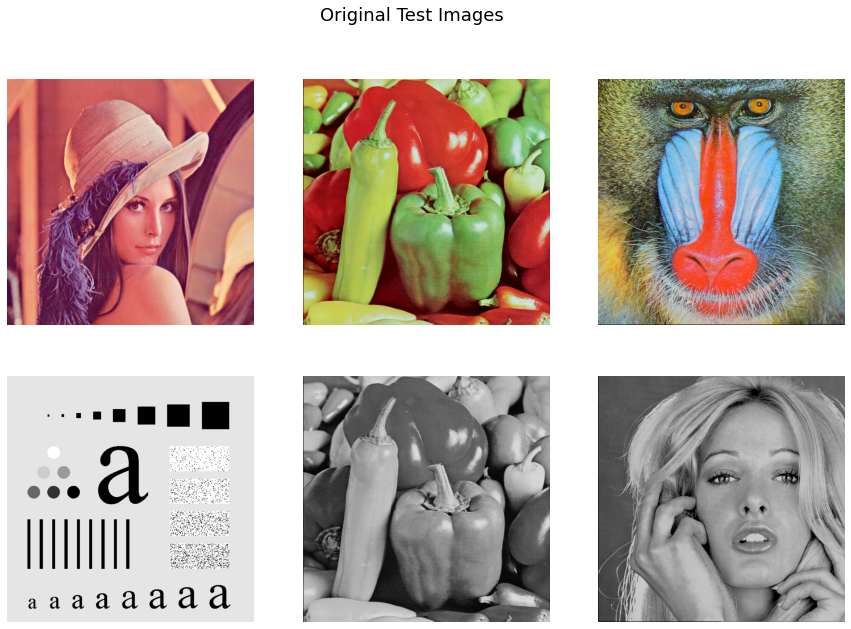

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image

# im = plt.imread(path)
# im = cv2.imread(path, cv2.IMREAD_COLOR)
# testim1 = Image.open(r"/content/Lenna_(test_image).png")
testim1 = plt.imread(r"/content/Lenna_(test_image).png",)
testim2 = plt.imread(r"/content/peppers.png")
testim3 = plt.imread(r"/content/baboon.png")
testim4 = cv.imread(r"/content/Testimage.png")
testim5 = cv.imread(r"/content/test12.jpg")
testim6 = cv.imread(r"/content/test9.jpg")

testims = [testim1,testim2,testim3,testim4,testim5,testim6]

def show_test_images(testims,title=""):
    tims = testims.copy()
    fig,ax = plt.subplots(2,3,figsize=(15,10))
    fig.suptitle(title,fontsize= 18)
# plt.axis('off')
# plt.xticks([])  
# plt.yticks([])  
    for i in range(2):
        for j in range(3):
            if i>0:
                ax[i][j].imshow(tims.pop(0),cmap='gray', vmin=0, vmax=255)
            else:
                ax[i][j].imshow(tims.pop(0))
            ax[i,j].axis('off')

show_test_images(testims,"Original Test Images")

# LENNA was a Swedish playboy model

##Transforms 

---
Log Transform


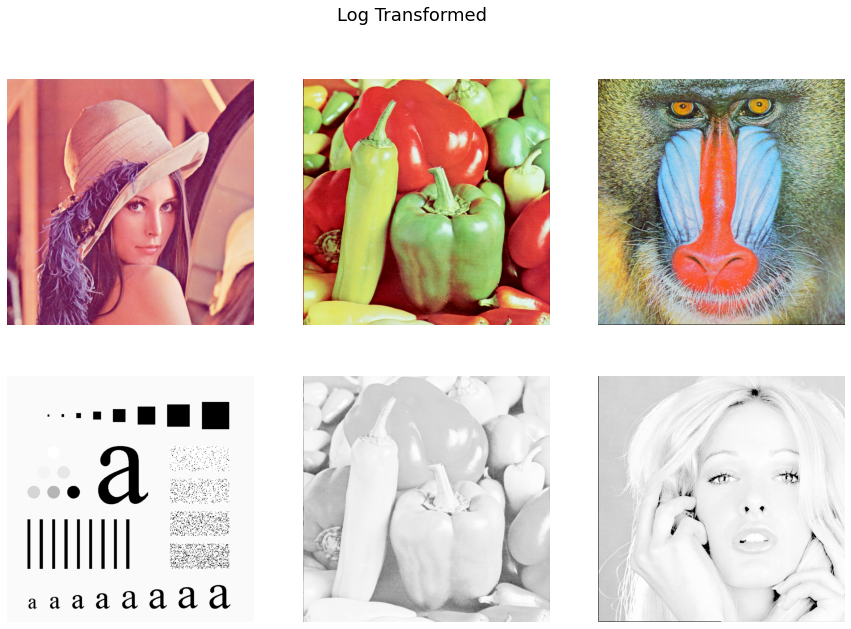

In [58]:
# Apply log transformation method
def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1.0001))
    log_image = np.array(log_image, dtype = np.uint8)
    return log_image

log_ims = []
for im in testims:
    log_ims.append(log_transform(im))

show_test_images(log_ims,"Log Transformed")

Power Law or Gamma Transform 

s = c*r^gamma

range = [0.4,25]

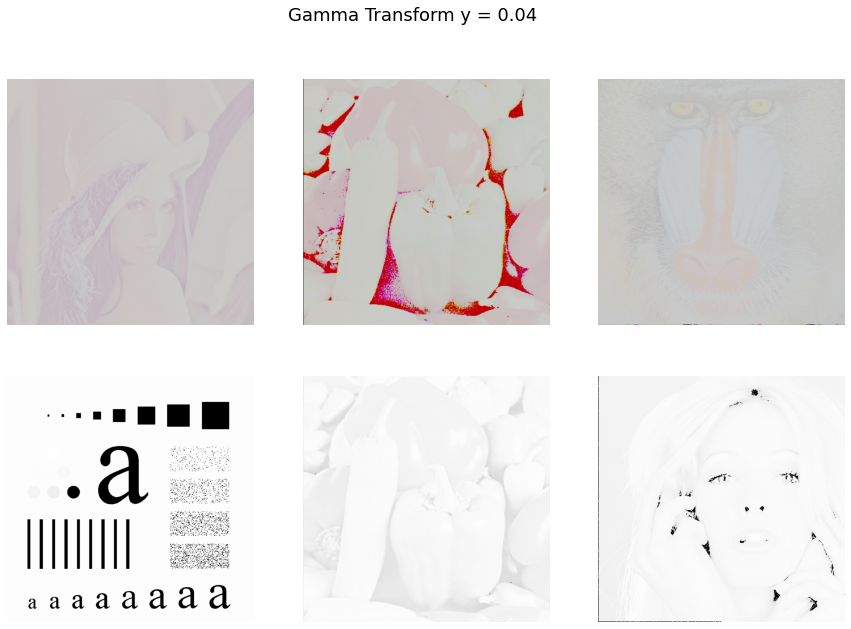

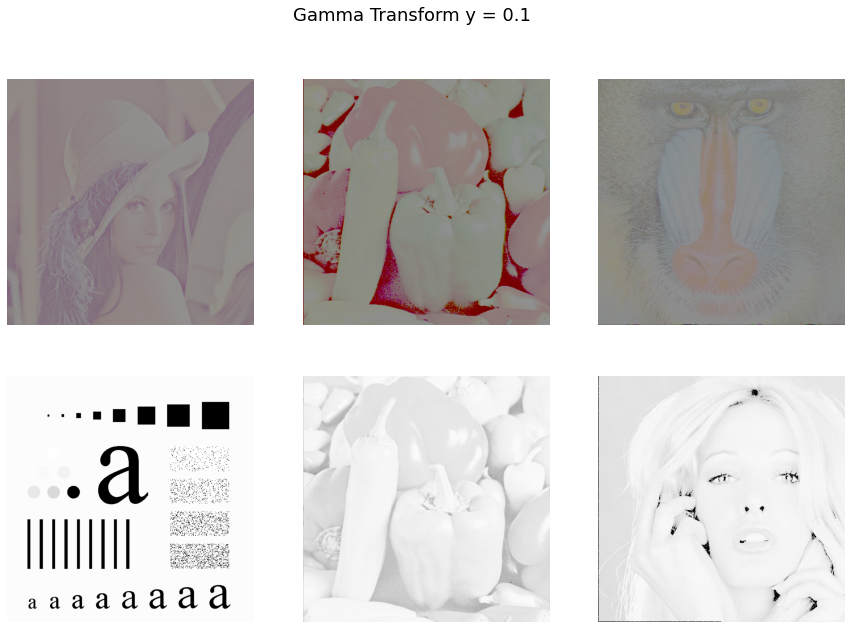

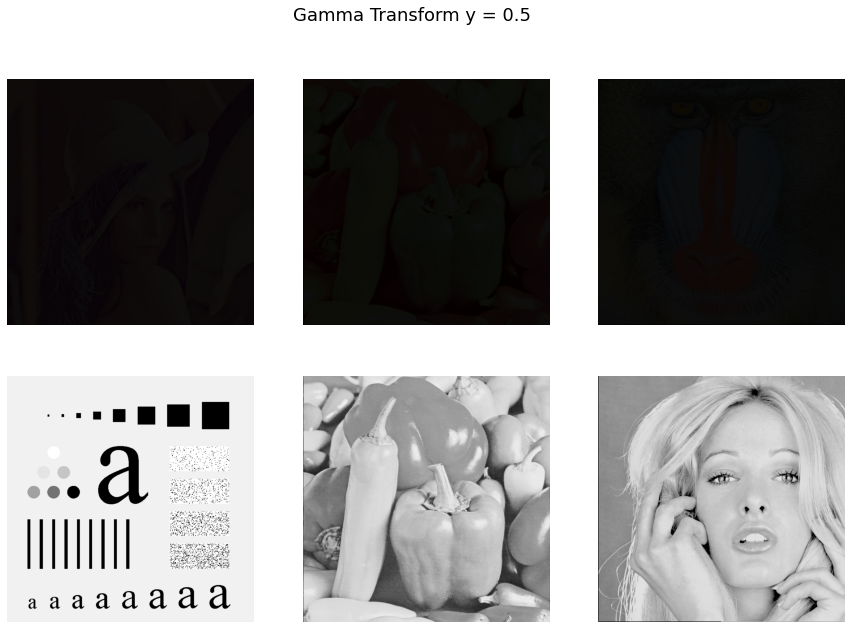

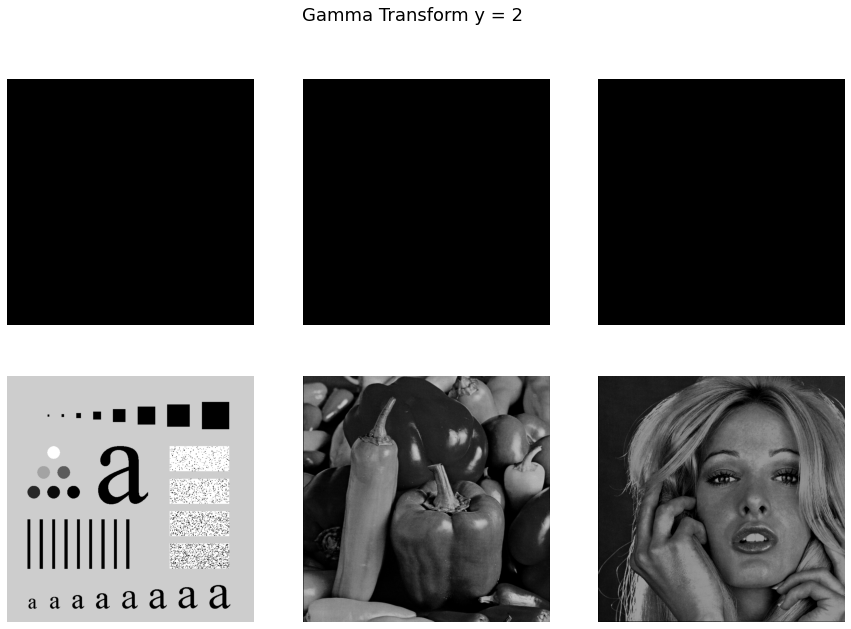

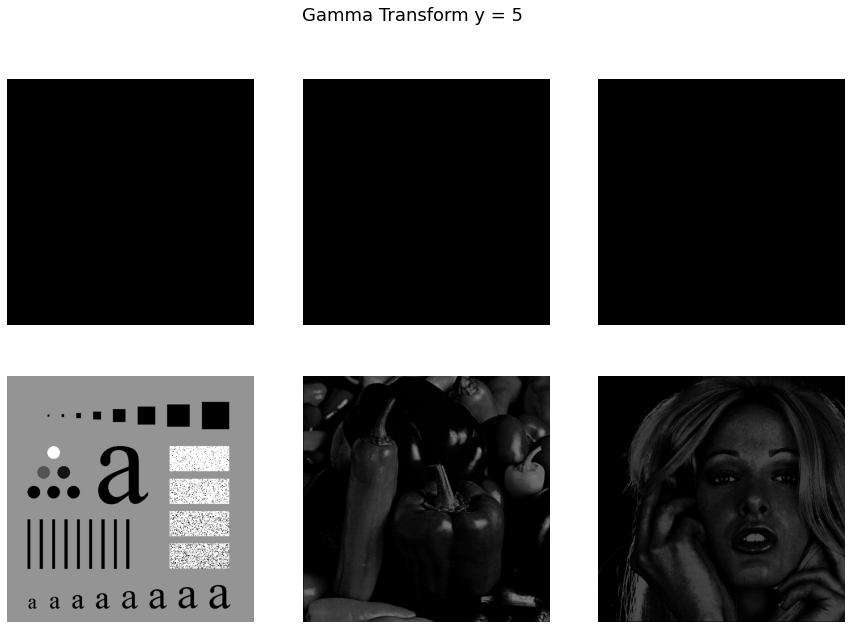

In [62]:
def gamma_transform(image,gamma = 0.5):
    gammaim = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
    return gammaim

gammaimsp04 = []
gammaimsp1 = []
gammaimsp5 = []
gammaims2p = []
gammaims5p = []
for im in testims:
    gammaimsp04.append(gamma_transform(im,0.04))
    gammaimsp1.append(gamma_transform(im,0.1))
    gammaimsp5.append(gamma_transform(im,0.5))
    gammaims2p.append(gamma_transform(im,2))
    gammaims5p.append(gamma_transform(im,5))

show_test_images(gammaimsp04,"Gamma Transform y = 0.04")
show_test_images(gammaimsp1,"Gamma Transform y = 0.1")
show_test_images(gammaimsp5,"Gamma Transform y = 0.5")
show_test_images(gammaims2p,"Gamma Transform y = 2")
show_test_images(gammaims5p,"Gamma Transform y = 5")

Contrast Stretching

Contrast =  (I_max - I_min)/(I_max + I_min)

If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


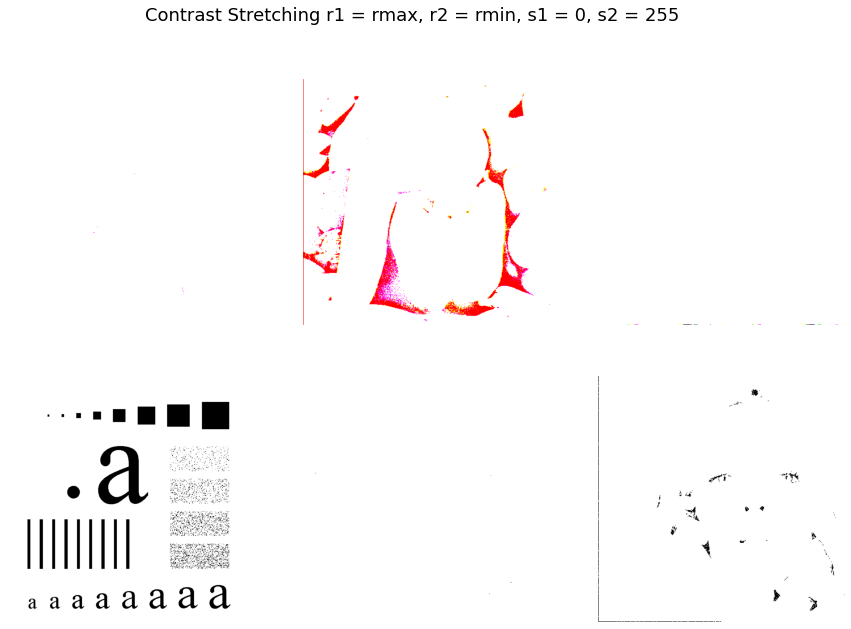

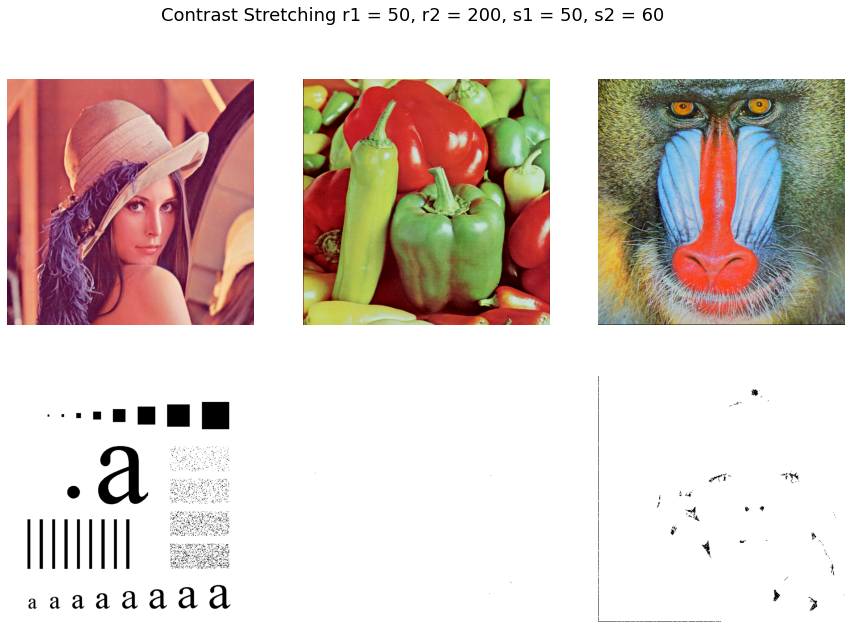

In [76]:
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
def contrast_stretch(img, r1,r2,s1,s2):
    pixelVal_vec = np.vectorize(pixelVal)
    contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
    return contrast_stretched

contrastims1 = []
contrastims2 = []
for im in testims:
    r1,r2,s1,s2 = np.min(im)+0.000001,np.max(im),0,255
    contrastims1.append(contrast_stretch(im,r1,r2,s1,s2))

for im in testims:
    r1,r2,s1,s2 = 50,200,50,60
    contrastims2.append(contrast_stretch(im,r1,r2,s1,s2))

show_test_images(contrastims1,f"Contrast Stretching r1 = rmax, r2 = rmin, s1 = 0, s2 = 255")
show_test_images(contrastims2,f"Contrast Stretching r1 = 50, r2 = 200, s1 = 50, s2 = 60")

Intestity Level Slicing

Min-Max 

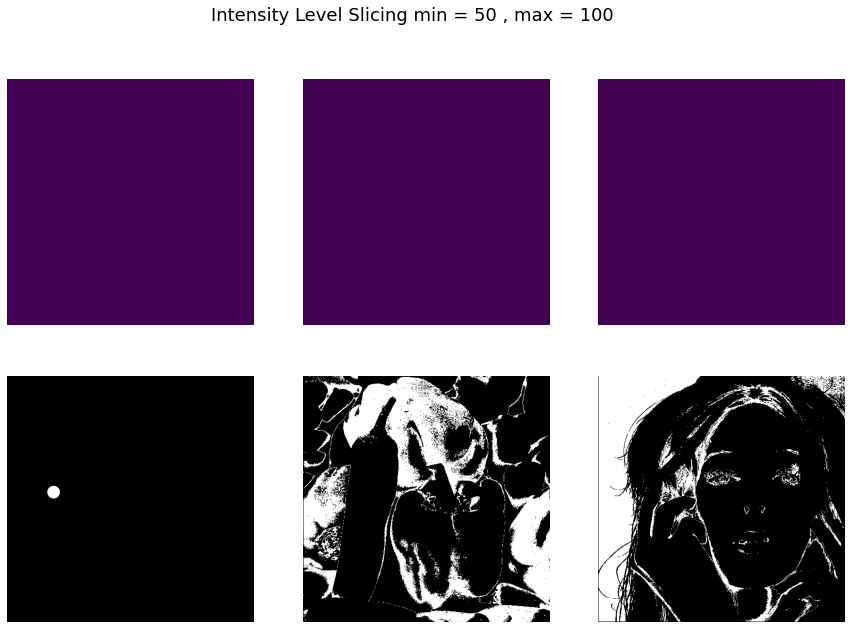

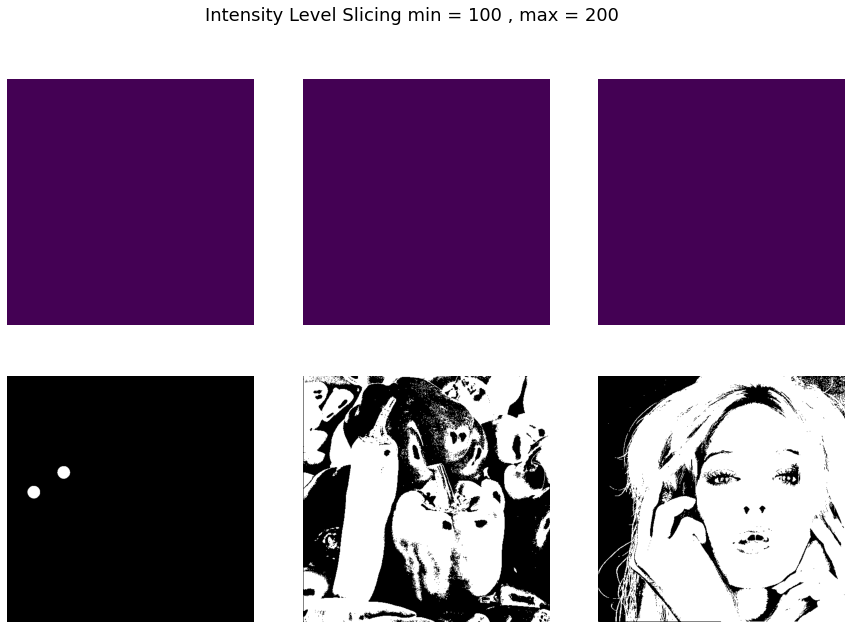

In [88]:
def intensity_slicing(img,min,max):
    row, column,x = img.shape
    # empty image
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img1 = np.zeros((row,column),dtype = 'uint8')
    
    # Loop over the input image and if pixel value lies in desired range set it to 255 otherwise set it to 0.
    for i in range(row):
        for j in range(column):
            if img[i,j] > min and img[i,j]<max:
                img1[i,j] = 255
            else:
                img1[i,j] = 0
    return img1

intensityims50100 = []
intensityims50200 = []
for im in testims:
    intensityims50100.append(intensity_slicing(im,50,100))
    intensityims50200.append(intensity_slicing(im,100,200))

show_test_images(intensityims50100,"Intensity Level Slicing min = 50 , max = 100")
show_test_images(intensityims50200,"Intensity Level Slicing min = 100 , max = 200")

Histogram Matching



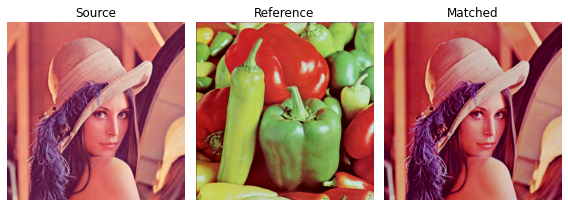

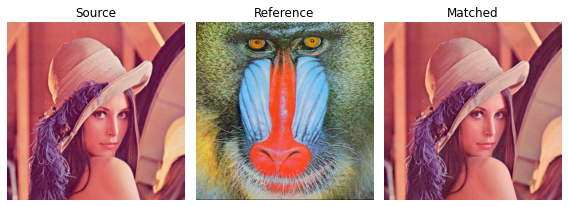

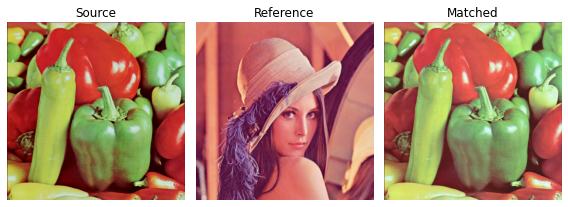

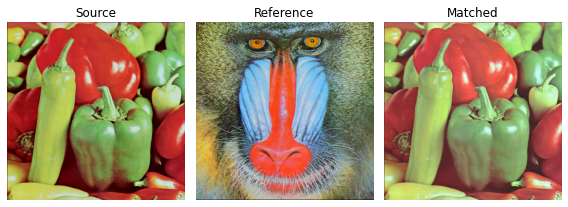

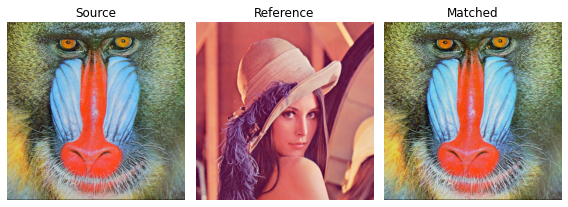

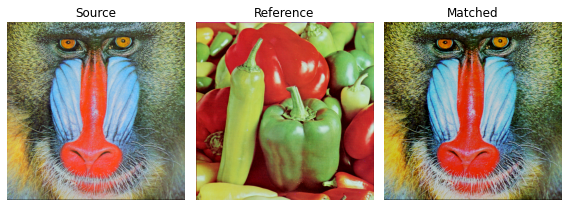

In [93]:
from skimage import exposure
from skimage.exposure import match_histograms

def display_matching(image,reference,matched):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                        sharex=True, sharey=True)
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(image)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

for i in range(3):
    for j in range(3):
        if i==j:
            continue
        image = testims[i]  
        reference = testims[j]
        matched = match_histograms(image, reference)
        display_matching(image,reference,matched)

Median Filter

Sharpening Filter

Gradient Image

Unsharp Masking